# Data Exploration

**Author:** Afamefuna Umejiaku <br>
**Date:** February 2026  <br>
**Purpose:** Exploratory analysis of Book Worm DataSet 
---


In [21]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
print("✅ Libraries imported successfully")

✅ Libraries imported successfully


---
## 1. Data Loading & Overview

In [2]:
# Load data files
media_spend = pd.read_excel('MediaSpend.xlsx')
project_data = pd.read_excel('ProjectInputData.xlsx')

print("📊 Data loaded successfully!")
print(f"\nMedia Spend shape: {media_spend.shape}")
print(f"Project Data shape: {project_data.shape}")

📊 Data loaded successfully!

Media Spend shape: (157, 8)
Project Data shape: (157, 12)


In [3]:
# Display first few rows of media spend data
print("\n=== Media Spend Data (First 5 rows) ===")
display(media_spend.head())


=== Media Spend Data (First 5 rows) ===


,Date,Google Display Cost,Google Branded Paid Search Cost,TV Cost,Google Generic Paid Search Cost,Influencers Cost,Meta Cost,YouTube Cost
0,2022-01-01,5.29,3580.52,0.00,5322.20,0.0,11637.19,5572.06
1,2022-01-08,93.74,5089.80,0.00,8332.18,2094.0,9171.14,5466.38
2,2022-01-15,1.55,6805.89,6308.57,11375.95,1059.0,8847.93,13711.66
3,2022-01-22,240.30,8085.96,44160.00,10568.90,174.0,8113.66,16921.80
4,2022-01-29,1.18,7761.05,44160.00,10806.54,264.0,11027.99,37302.22


In [4]:
# Display first few rows of project input data
print("\n=== Project Input Data (First 5 rows) ===")
display(project_data.head())


=== Project Input Data (First 5 rows) ===


,Date,Accounts Subscriptions,Google_Display_Impressions,Meta_Impressions,Google_Generic_Paid_Search_Impressions,TV_GRP,Influencers_Views,Google_Brand_Paid_Search_Clicks,YouTube_Impressions,Dates_School_Holidays,Competitors Promotion,Promotion
0,2022-01-01,4182.0,49.0,3.50e+06,152181.0,0.00,0.0,4049,1951.0,0,14.0,14.0
1,2022-01-08,5167.5,1061.0,2.90e+06,167010.0,0.00,698.0,4497,1914.0,6,14.0,14.0
2,2022-01-15,6229.0,20.0,2.21e+06,179189.0,274.29,353.0,5787,4801.0,7,14.0,14.0
3,2022-01-22,7801.5,3088.0,2.57e+06,209859.0,1920.00,58.0,7032,5925.0,7,14.0,14.0
4,2022-01-29,9505.0,11.0,3.72e+06,214967.0,1920.00,88.0,6943,13061.0,7,14.0,14.0


In [5]:
# Data info
print("\n=== Media Spend Data Info ===")
print(media_spend.info())

print("\n=== Project Data Info ===")
print(project_data.info())


=== Media Spend Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             157 non-null    datetime64[ns]
 1   Google Display Cost              157 non-null    float64       
 2   Google Branded Paid Search Cost  157 non-null    float64       
 3   TV Cost                          157 non-null    float64       
 4   Google Generic Paid Search Cost  157 non-null    float64       
 5   Influencers Cost                 157 non-null    float64       
 6   Meta Cost                        157 non-null    float64       
 7   YouTube Cost                     157 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 9.9 KB
None

=== Project Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns

---
## 2. Data Quality Assessment

In [6]:
# Check for missing values
print("=== Missing Values Check ===")
print("\nMedia Spend:")
print(media_spend.isnull().sum())

print("\nProject Data:")
print(project_data.isnull().sum())

if media_spend.isnull().sum().sum() == 0 and project_data.isnull().sum().sum() == 0:
    print("\n✅ No missing values detected - excellent data quality!")

=== Missing Values Check ===

Media Spend:
Date                               0
Google Display Cost                0
Google Branded Paid Search Cost    0
TV Cost                            0
Google Generic Paid Search Cost    0
Influencers Cost                   0
Meta Cost                          0
YouTube Cost                       0
dtype: int64

Project Data:
Date                                      0
Accounts Subscriptions                    0
Google_Display_Impressions                0
Meta_Impressions                          0
Google_Generic_Paid_Search_Impressions    0
TV_GRP                                    0
Influencers_Views                         0
Google_Brand_Paid_Search_Clicks           0
YouTube_Impressions                       0
Dates_School_Holidays                     0
Competitors Promotion                     0
Promotion                                 0
dtype: int64

✅ No missing values detected - excellent data quality!


In [7]:
# Date range and frequency check
print("=== Date Range & Frequency ===")
print(f"\nDate Range: {media_spend['Date'].min().date()} to {media_spend['Date'].max().date()}")
print(f"Total Weeks: {len(media_spend)}")
print(f"Time Period: {(media_spend['Date'].max() - media_spend['Date'].min()).days / 365.25:.1f} years")

# Check date alignment between files
dates_aligned = (media_spend['Date'] == project_data['Date']).all()
print(f"\n✅ Dates aligned between files: {dates_aligned}")

# Check for date gaps
date_diff = media_spend['Date'].diff()[1:]
mode_diff = date_diff.mode()[0]
print(f"\nTypical interval between dates: {mode_diff.days} days")

if mode_diff.days == 7:
    print("✅ Weekly data confirmed - ideal for MMM!")

=== Date Range & Frequency ===

Date Range: 2022-01-01 to 2024-12-28
Total Weeks: 157
Time Period: 3.0 years

✅ Dates aligned between files: True

Typical interval between dates: 7 days
✅ Weekly data confirmed - ideal for MMM!


In [8]:
# Basic statistics for all numeric columns
print("=== Media Spend Statistics ===")
display(media_spend.describe())

=== Media Spend Statistics ===


,Date,Google Display Cost,Google Branded Paid Search Cost,TV Cost,Google Generic Paid Search Cost,Influencers Cost,Meta Cost,YouTube Cost
count,157,157.00,157.00,157.00,157.00,157.00,157.00,157.00
mean,2023-07-01 00:00:00,1678.47,11351.31,4546.09,13167.51,109.18,14025.02,17496.13
min,2022-01-01 00:00:00,0.00,1988.23,0.00,5232.78,0.00,0.00,4112.64
25%,2022-10-01 00:00:00,0.00,6713.39,0.00,10110.50,0.00,7588.92,10198.78
50%,2023-07-01 00:00:00,0.00,8418.02,0.00,12526.48,0.00,11027.99,13220.42
75%,2024-03-30 00:00:00,310.46,14197.70,3419.84,15688.43,0.00,18369.78,18264.12
max,2024-12-28 00:00:00,29709.66,45462.33,79842.86,28363.86,2094.00,44900.17,88821.60
std,NaN,4615.29,8247.40,12949.92,4319.08,348.20,9701.81,15494.33


---
## 3. Target Variable Analysis (KPI)

Our primary KPI is **Account Subscriptions** - this is what we want to predict and optimize.

In [9]:
# KPI Summary Statistics
kpi = project_data['Accounts Subscriptions']

print("=== Account Subscriptions (KPI) Summary ===")
print(f"\nMean: {kpi.mean():,.1f}")
print(f"Median: {kpi.median():,.1f}")
print(f"Std Dev: {kpi.std():,.1f}")
print(f"Min: {kpi.min():,.1f}")
print(f"Max: {kpi.max():,.1f}")
print(f"CV (Coefficient of Variation): {(kpi.std() / kpi.mean() * 100):.1f}%")
print(f"\nTotal Subscriptions (3 years): {kpi.sum():,.0f}")

=== Account Subscriptions (KPI) Summary ===

Mean: 5,752.0
Median: 5,435.5
Std Dev: 1,338.1
Min: 3,597.0
Max: 10,163.5
CV (Coefficient of Variation): 23.3%

Total Subscriptions (3 years): 903,070


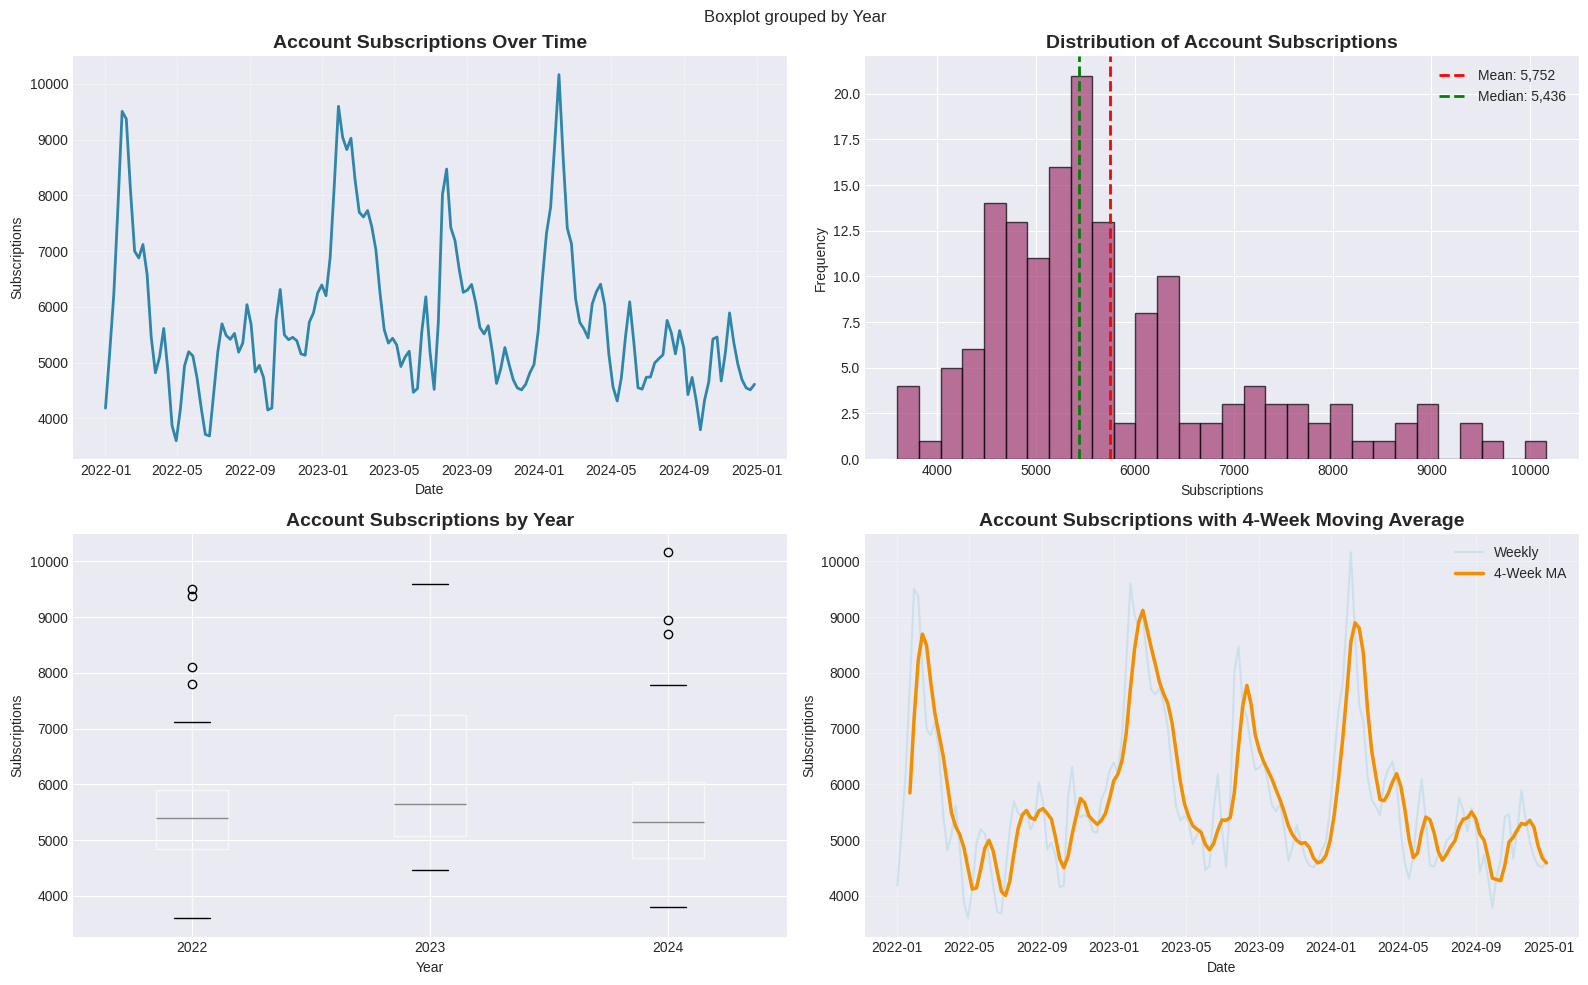

✅ KPI visualizations created


In [10]:
# Visualize KPI over time
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Time series plot
axes[0, 0].plot(project_data['Date'], kpi, linewidth=2, color='#2E86AB')
axes[0, 0].set_title('Account Subscriptions Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Subscriptions')
axes[0, 0].grid(True, alpha=0.3)

# Distribution
axes[0, 1].hist(kpi, bins=30, edgecolor='black', alpha=0.7, color='#A23B72')
axes[0, 1].axvline(kpi.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {kpi.mean():,.0f}')
axes[0, 1].axvline(kpi.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {kpi.median():,.0f}')
axes[0, 1].set_title('Distribution of Account Subscriptions', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Subscriptions')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Box plot by year
project_data['Year'] = project_data['Date'].dt.year
project_data.boxplot(column='Accounts Subscriptions', by='Year', ax=axes[1, 0])
axes[1, 0].set_title('Account Subscriptions by Year', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Subscriptions')
plt.sca(axes[1, 0])
plt.xticks(rotation=0)

# Moving average (4-week)
ma_4week = kpi.rolling(window=4).mean()
axes[1, 1].plot(project_data['Date'], kpi, alpha=0.5, label='Weekly', color='lightblue')
axes[1, 1].plot(project_data['Date'], ma_4week, linewidth=2.5, label='4-Week MA', color='#F18F01')
axes[1, 1].set_title('Account Subscriptions with 4-Week Moving Average', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Subscriptions')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('kpi_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ KPI visualizations created")

---
## 4. Media Spend Analysis

In [11]:
# Get media channel columns
media_channels = [col for col in media_spend.columns if 'Cost' in col]

# Total spend by channel
total_spend = media_spend[media_channels].sum().sort_values(ascending=False)
spend_percentage = (total_spend / total_spend.sum() * 100)

print("=== Total Media Spend by Channel ===")
spend_summary = pd.DataFrame({
    'Total Spend ($)': total_spend,
    'Percentage (%)': spend_percentage,
    'Avg Weekly Spend ($)': media_spend[media_channels].mean()
})
display(spend_summary)

print(f"\n💰 Total Marketing Investment: ${total_spend.sum():,.2f}")
print(f"📊 Average Weekly Spend: ${total_spend.sum() / len(media_spend):,.2f}")

=== Total Media Spend by Channel ===


,Total Spend ($),Percentage (%),Avg Weekly Spend ($)
Google Branded Paid Search Cost,1.78e+06,18.20,11351.31
Google Display Cost,2.64e+05,2.69,1678.47
Google Generic Paid Search Cost,2.07e+06,21.11,13167.51
Influencers Cost,1.71e+04,0.18,109.18
Meta Cost,2.20e+06,22.49,14025.02
TV Cost,7.14e+05,7.29,4546.09
YouTube Cost,2.75e+06,28.05,17496.13



💰 Total Marketing Investment: $9,792,674.73
📊 Average Weekly Spend: $62,373.72


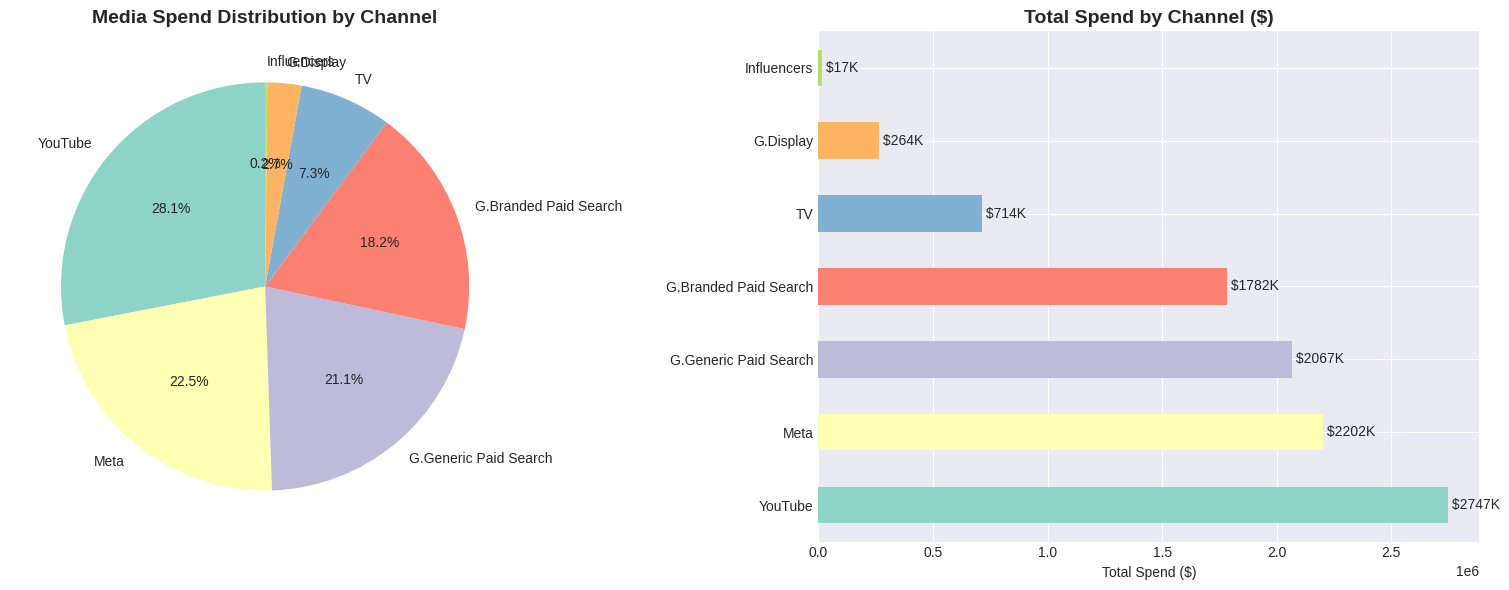

In [12]:
# Visualize media spend distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
colors = plt.cm.Set3(range(len(total_spend)))
axes[0].pie(total_spend, labels=[c.replace(' Cost', '').replace('Google ', 'G.') for c in total_spend.index], 
            autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('Media Spend Distribution by Channel', fontsize=14, fontweight='bold')

# Bar chart
total_spend.plot(kind='barh', ax=axes[1], color=colors)
axes[1].set_title('Total Spend by Channel ($)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Total Spend ($)')
axes[1].set_ylabel('')
axes[1].yaxis.set_label_text('')
axes[1].set_yticklabels([c.replace(' Cost', '').replace('Google ', 'G.') for c in total_spend.index])

for i, v in enumerate(total_spend):
    axes[1].text(v, i, f' ${v/1000:.0f}K', va='center')

plt.tight_layout()
plt.savefig('media_spend_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

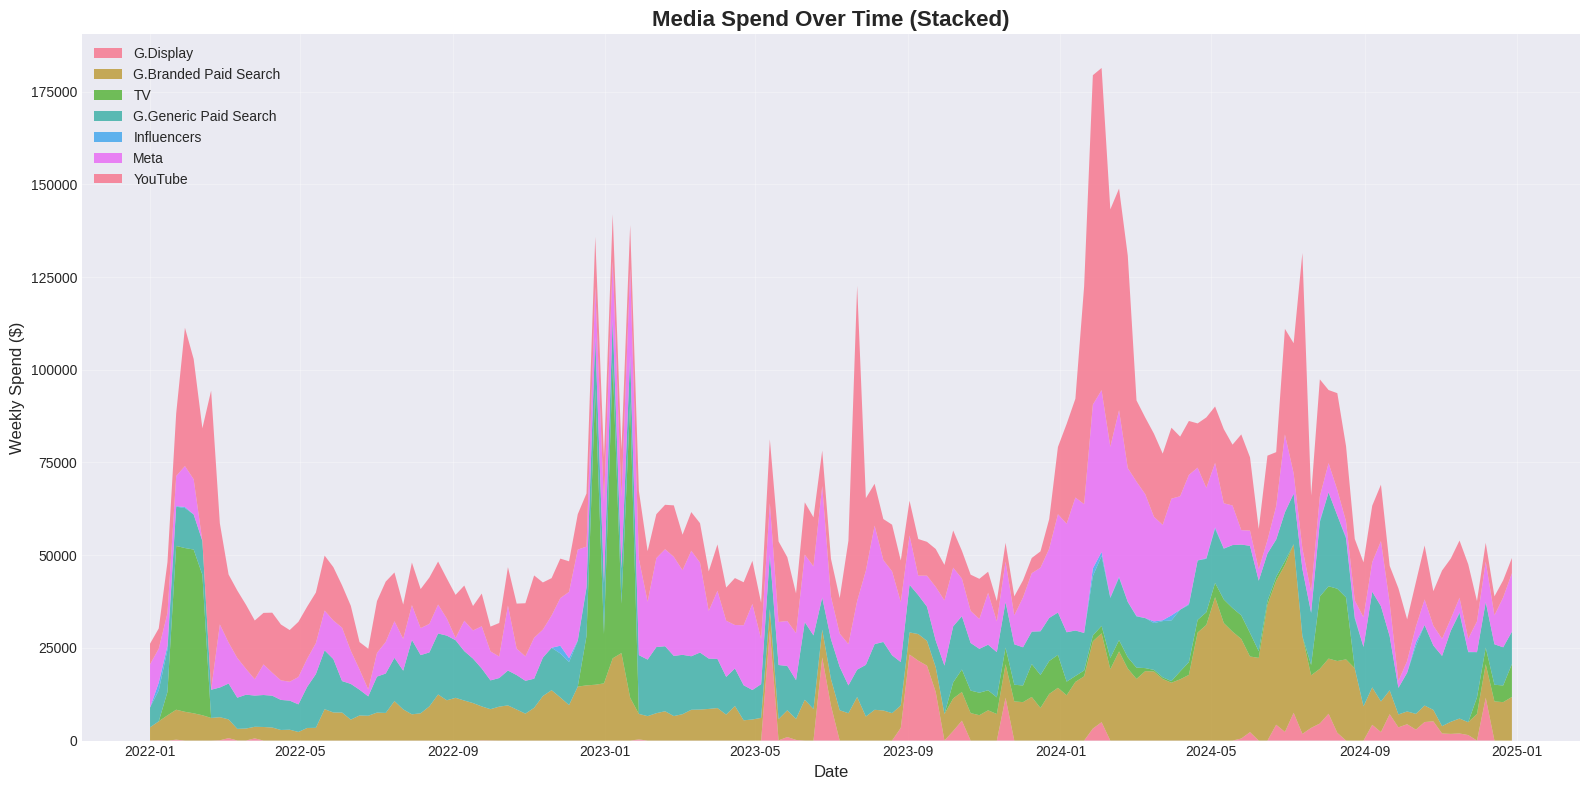

In [13]:
# Media spend over time (stacked area chart)
fig, ax = plt.subplots(figsize=(16, 8))

# Prepare data for stacked area
spend_data = media_spend[['Date'] + media_channels].set_index('Date')
spend_data.columns = [c.replace(' Cost', '').replace('Google ', 'G.') for c in spend_data.columns]

ax.stackplot(spend_data.index, 
             *[spend_data[col] for col in spend_data.columns],
             labels=spend_data.columns,
             alpha=0.8)

ax.set_title('Media Spend Over Time (Stacked)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Weekly Spend ($)', fontsize=12)
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('media_spend_timeline.png', dpi=300, bbox_inches='tight')
plt.show()

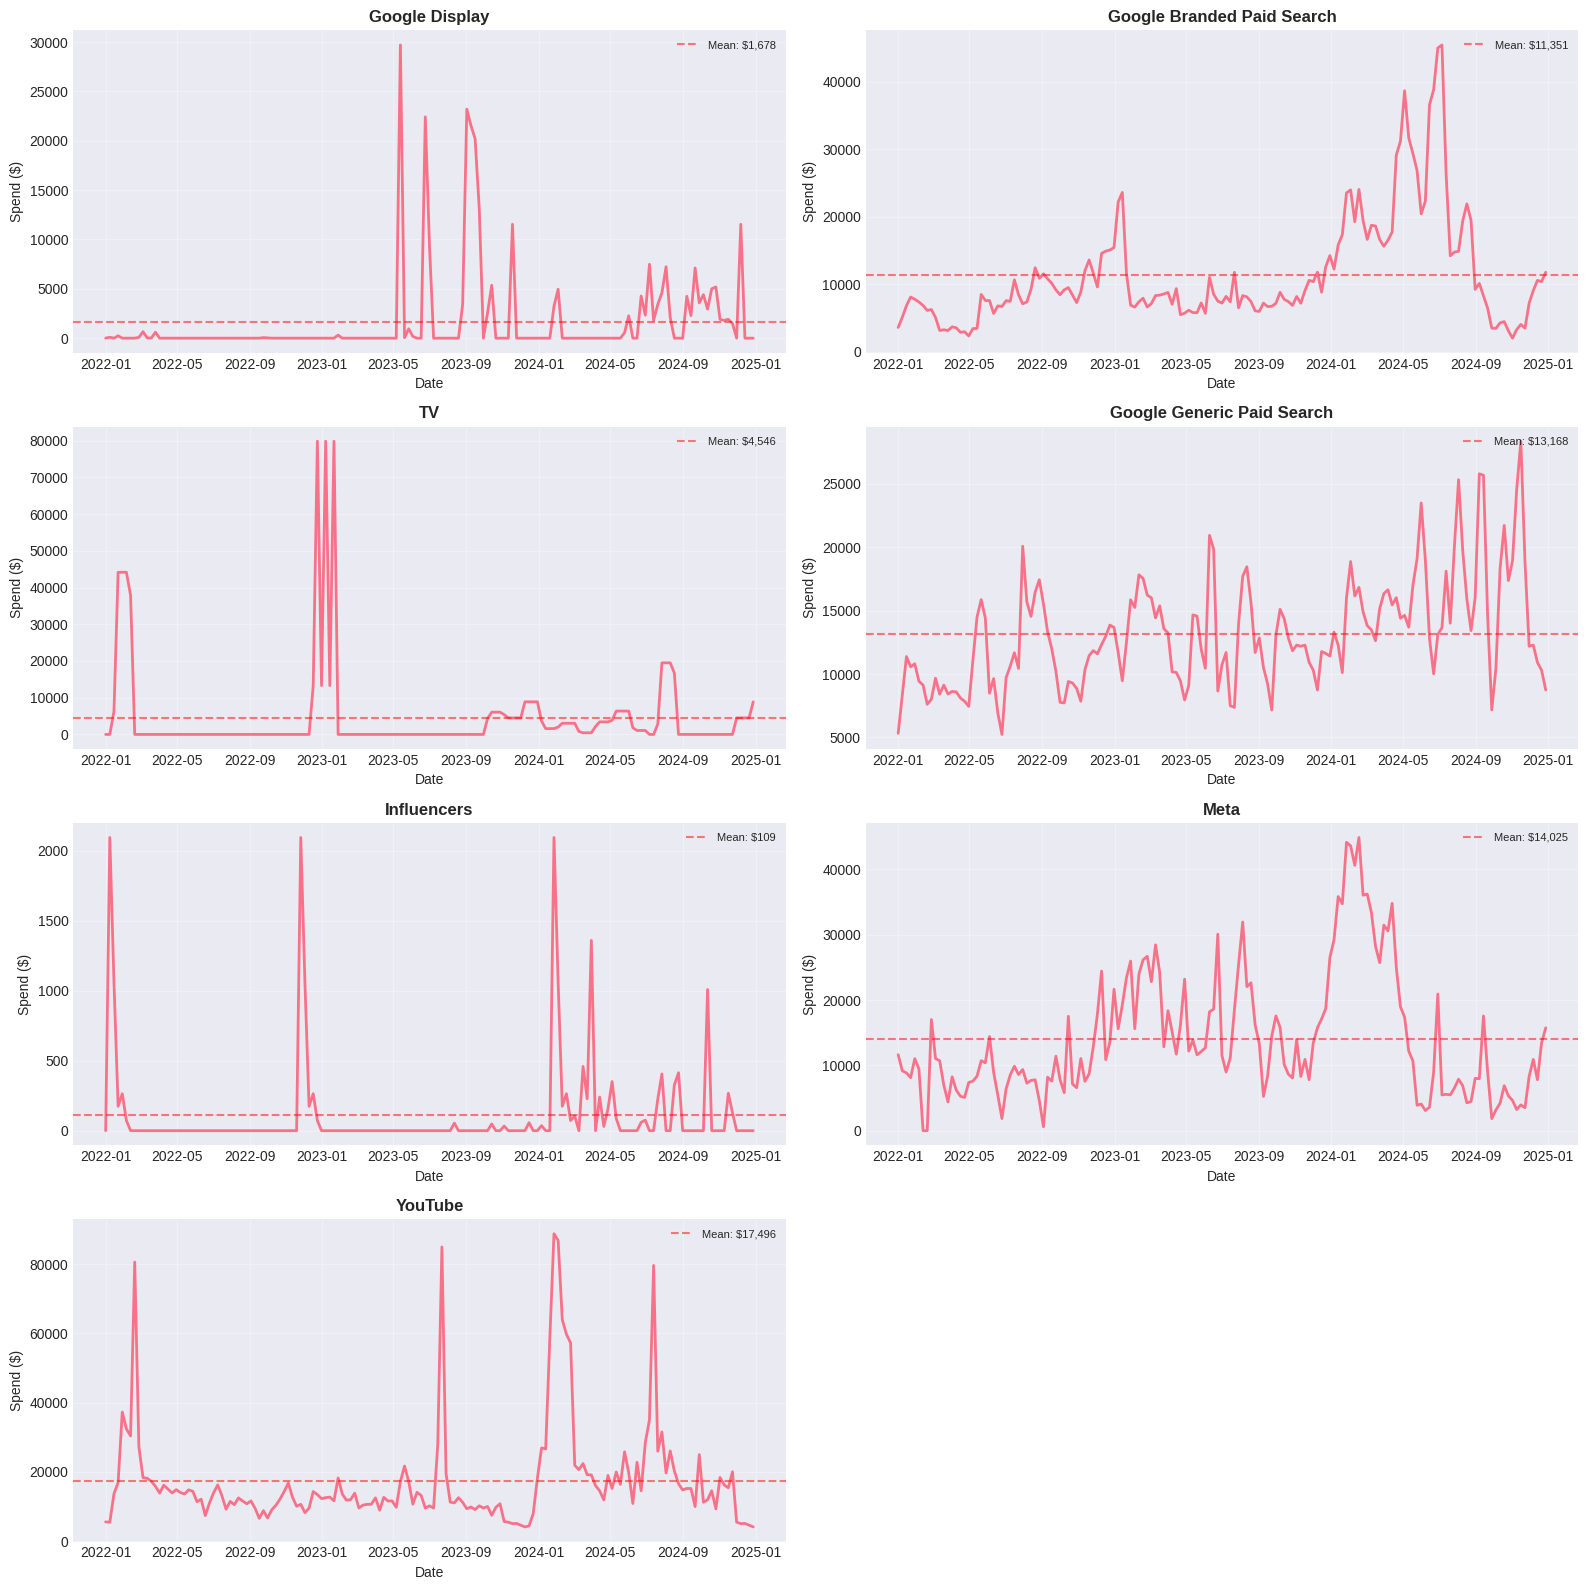

In [14]:
# Individual channel trends
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = axes.flatten()

for idx, channel in enumerate(media_channels):
    axes[idx].plot(media_spend['Date'], media_spend[channel], linewidth=2)
    axes[idx].set_title(channel.replace(' Cost', ''), fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Spend ($)')
    axes[idx].grid(True, alpha=0.3)
    
    # Add summary stats as text
    mean_spend = media_spend[channel].mean()
    axes[idx].axhline(mean_spend, color='red', linestyle='--', alpha=0.5, label=f'Mean: ${mean_spend:,.0f}')
    axes[idx].legend(loc='upper right', fontsize=8)

# Remove extra subplot
if len(media_channels) < 8:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig('individual_channel_trends.png', dpi=300, bbox_inches='tight')
plt.show()

---
## 5. Media Performance Metrics

Analyzing impressions, clicks, views, and GRPs alongside spend.

In [15]:
# Get performance metric columns
performance_cols = ['Google_Display_Impressions', 'Meta_Impressions', 
                   'Google_Generic_Paid_Search_Impressions', 'TV_GRP',
                   'Influencers_Views', 'Google_Brand_Paid_Search_Clicks', 
                   'YouTube_Impressions']

print("=== Media Performance Metrics Summary ===")
display(project_data[performance_cols].describe())

=== Media Performance Metrics Summary ===


,Google_Display_Impressions,Meta_Impressions,Google_Generic_Paid_Search_Impressions,TV_GRP,Influencers_Views,Google_Brand_Paid_Search_Clicks,YouTube_Impressions
count,157.00,1.57e+02,157.00,157.00,157.00,157.00,157.00
mean,22124.24,3.48e+06,378542.14,252.66,36.39,4628.98,6126.10
std,69072.85,2.28e+06,129410.23,634.13,116.07,1435.31,5425.19
min,0.00,0.00e+00,152181.00,0.00,0.00,385.00,1440.00
25%,0.00,1.88e+06,286411.00,0.00,0.00,4273.00,3571.00
50%,0.00,2.89e+06,368084.00,0.00,0.00,4919.00,4629.00
75%,3450.00,4.56e+06,464800.00,56.00,0.00,5382.00,6395.00
max,526556.00,9.54e+06,707923.00,3471.43,698.00,8338.00,31100.00


In [16]:
# Calculate cost per impression/view/click where applicable
efficiency_metrics = pd.DataFrame()

# Google Display: Cost per 1000 impressions (CPM)
efficiency_metrics['Google Display CPM'] = (media_spend['Google Display Cost'] / 
                                            project_data['Google_Display_Impressions'] * 1000)

# Meta: CPM
efficiency_metrics['Meta CPM'] = (media_spend['Meta Cost'] / 
                                  project_data['Meta_Impressions'] * 1000)

# YouTube: CPM
efficiency_metrics['YouTube CPM'] = (media_spend['YouTube Cost'] / 
                                     project_data['YouTube_Impressions'] * 1000)

# Generic Paid Search: CPM
efficiency_metrics['Generic Search CPM'] = (media_spend['Google Generic Paid Search Cost'] / 
                                            project_data['Google_Generic_Paid_Search_Impressions'] * 1000)

# Branded Paid Search: CPC
efficiency_metrics['Branded Search CPC'] = (media_spend['Google Branded Paid Search Cost'] / 
                                            project_data['Google_Brand_Paid_Search_Clicks'])

# Influencers: Cost per 1000 views
efficiency_metrics['Influencers CPV (per 1K)'] = (media_spend['Influencers Cost'] / 
                                                  project_data['Influencers_Views'] * 1000)

print("\n=== Average Efficiency Metrics ===")
display(efficiency_metrics.mean().to_frame('Average').T)

print("\n=== Efficiency Metrics Over Time (Median) ===")
display(efficiency_metrics.median().to_frame('Median').T)


=== Average Efficiency Metrics ===


,Google Display CPM,Meta CPM,YouTube CPM,Generic Search CPM,Branded Search CPC,Influencers CPV (per 1K)
Average,95.11,4.15,2856.0,36.17,2.69,3000.0



=== Efficiency Metrics Over Time (Median) ===


,Google Display CPM,Meta CPM,YouTube CPM,Generic Search CPM,Branded Search CPC,Influencers CPV (per 1K)
Median,89.07,3.91,2856.0,36.19,1.95,3000.0


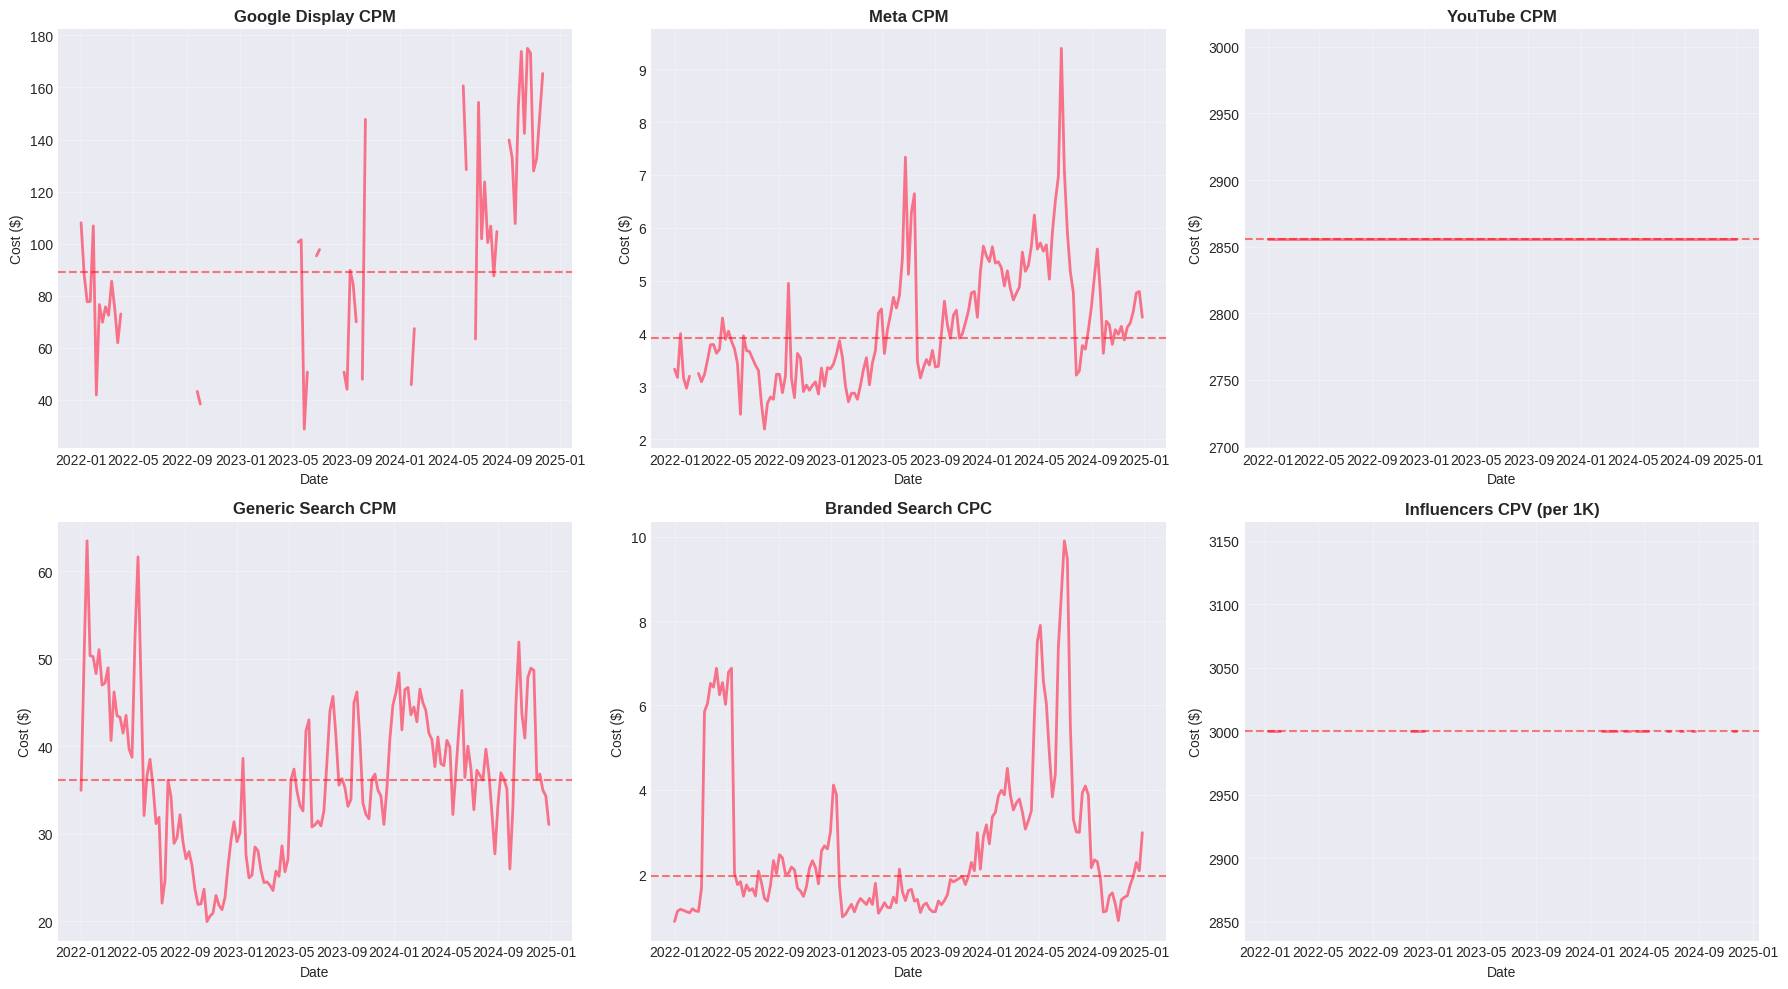

In [17]:
# Visualize efficiency metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(efficiency_metrics.columns):
    axes[idx].plot(media_spend['Date'], efficiency_metrics[col], linewidth=2)
    axes[idx].set_title(col, fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Cost ($)')
    axes[idx].grid(True, alpha=0.3)
    
    # Add median line
    median_val = efficiency_metrics[col].median()
    axes[idx].axhline(median_val, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('efficiency_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

---
## 6. Correlations & Relationships

In [18]:
# Merge datasets for correlation analysis
# Clean column names for media spend
media_clean = media_spend.copy()
media_clean.columns = ['Date'] + [col.replace(' Cost', '_Spend') for col in media_channels]

# Merge
full_data = pd.merge(media_clean, project_data, on='Date')

print("✅ Data merged for correlation analysis")
print(f"Shape: {full_data.shape}")

✅ Data merged for correlation analysis
Shape: (157, 20)


In [19]:
# Correlation with target variable (Account Subscriptions)
spend_cols = [col for col in full_data.columns if '_Spend' in col]
performance_cols_analysis = [col for col in full_data.columns if col in performance_cols]

# Calculate correlations
correlations_spend = full_data[spend_cols + ['Accounts Subscriptions']].corr()['Accounts Subscriptions'].drop('Accounts Subscriptions')
correlations_performance = full_data[performance_cols_analysis + ['Accounts Subscriptions']].corr()['Accounts Subscriptions'].drop('Accounts Subscriptions')

print("=== Correlation with Account Subscriptions ===")
print("\nMedia Spend Correlations:")
print(correlations_spend.sort_values(ascending=False))

print("\nMedia Performance Correlations:")
print(correlations_performance.sort_values(ascending=False))

=== Correlation with Account Subscriptions ===

Media Spend Correlations:
Meta_Spend                          0.55
YouTube_Spend                       0.45
TV_Spend                            0.26
Google Generic Paid Search_Spend    0.16
Influencers_Spend                   0.13
Google Branded Paid Search_Spend    0.01
Google Display_Spend               -0.05
Name: Accounts Subscriptions, dtype: float64

Media Performance Correlations:
Meta_Impressions                          0.66
Google_Brand_Paid_Search_Clicks           0.55
YouTube_Impressions                       0.45
TV_GRP                                    0.24
Google_Generic_Paid_Search_Impressions    0.17
Influencers_Views                         0.13
Google_Display_Impressions               -0.02
Name: Accounts Subscriptions, dtype: float64


In [20]:
# Visualize correlations
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Spend correlations
correlations_spend.sort_values().plot(kind='barh', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Media Spend Correlation with Account Subscriptions', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Correlation Coefficient')
axes[0].axvline(0, color='black', linewidth=0.8)
axes[0].grid(True, alpha=0.3)

# Performance correlations
correlations_performance.sort_values().plot(kind='barh', ax=axes[1], color='lightc
import warnings
warnings.filterwarnings('ignore')
oral', edgecolor='black')
axes[1].set_title('Media Performance Correlation with Account Subscriptions', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Correlation Coefficient')
axes[1].axvline(0, color='black', linewidth=0.8)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

SyntaxError: unterminated string literal (detected at line 12) (3706805791.py, line 12)

In [ ]:
# Full correlation heatmap for media spend
fig, ax = plt.subplots(figsize=(12, 10))

corr_matrix = full_data[spend_cols + ['Accounts Subscriptions']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)

ax.set_title('Correlation Matrix: Media Spend & Account Subscriptions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Scatter plots: Top 4 correlated channels vs KPI
top_channels = correlations_spend.abs().nlargest(4).index

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, channel in enumerate(top_channels):
    axes[idx].scatter(full_data[channel], full_data['Accounts Subscriptions'], 
                     alpha=0.6, s=50, edgecolor='black', linewidth=0.5)
    
    # Add trend line
    z = np.polyfit(full_data[channel], full_data['Accounts Subscriptions'], 1)
    p = np.poly1d(z)
    axes[idx].plot(full_data[channel], p(full_data[channel]), "r--", linewidth=2, alpha=0.8)
    
    axes[idx].set_xlabel(channel.replace('_Spend', ''), fontsize=11)
    axes[idx].set_ylabel('Account Subscriptions', fontsize=11)
    axes[idx].set_title(f'{channel.replace("_Spend", "")} vs Subscriptions\n(r = {correlations_spend[channel]:.3f})', 
                       fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('scatter_top_channels.png', dpi=300, bbox_inches='tight')
plt.show()

---
## 7. Seasonality & Trends

In [ ]:
# Add time-based features
full_data['Week'] = full_data['Date'].dt.isocalendar().week
full_data['Month'] = full_data['Date'].dt.month
full_data['Quarter'] = full_data['Date'].dt.quarter
full_data['Year'] = full_data['Date'].dt.year

print("✅ Time-based features added")

In [ ]:
# Monthly seasonality
monthly_avg = full_data.groupby('Month')['Accounts Subscriptions'].mean()
monthly_spend = full_data.groupby('Month')[spend_cols].sum().sum(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Subscriptions by month
monthly_avg.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Average Account Subscriptions by Month', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Avg Subscriptions')
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Spend by month
monthly_spend.plot(kind='bar', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Total Media Spend by Month', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Spend ($)')
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('monthly_seasonality.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Quarterly trends
quarterly_data = full_data.groupby(['Year', 'Quarter']).agg({
    'Accounts Subscriptions': 'sum',
    **{col: 'sum' for col in spend_cols}
}).reset_index()

quarterly_data['Period'] = quarterly_data['Year'].astype(str) + '-Q' + quarterly_data['Quarter'].astype(str)
quarterly_data['Total_Spend'] = quarterly_data[spend_cols].sum(axis=1)

fig, ax1 = plt.subplots(figsize=(16, 6))

# Subscriptions
ax1.bar(quarterly_data['Period'], quarterly_data['Accounts Subscriptions'], 
        alpha=0.7, color='steelblue', label='Subscriptions')
ax1.set_xlabel('Quarter', fontsize=12)
ax1.set_ylabel('Account Subscriptions', fontsize=12, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticklabels(quarterly_data['Period'], rotation=45)

# Spend on secondary axis
ax2 = ax1.twinx()
ax2.plot(quarterly_data['Period'], quarterly_data['Total_Spend'], 
         color='coral', marker='o', linewidth=3, markersize=8, label='Total Spend')
ax2.set_ylabel('Total Media Spend ($)', fontsize=12, color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

ax1.set_title('Quarterly Subscriptions vs Media Spend', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('quarterly_trends.png', dpi=300, bbox_inches='tight')
plt.show()

---
## 8. Control Variables

In [ ]:
# Analyze control variables
control_vars = ['Dates_School_Holidays', 'Competitors Promotion', 'Promotion']

print("=== Control Variables Summary ===")
display(full_data[control_vars].describe())

# Impact on KPI
print("\n=== Impact of Control Variables on Account Subscriptions ===")

for var in control_vars:
    corr = full_data[['Accounts Subscriptions', var]].corr().iloc[0, 1]
    print(f"\n{var}:")
    print(f"  Correlation: {corr:.3f}")
    print(f"  Unique values: {full_data[var].nunique()}")
    print(f"  Value counts:\n{full_data[var].value_counts().head()}")

In [ ]:
# Visualize control variables impact
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, var in enumerate(control_vars):
    # Group by control variable and show average subscriptions
    grouped = full_data.groupby(var)['Accounts Subscriptions'].mean().sort_index()
    
    grouped.plot(kind='bar', ax=axes[idx], color='mediumpurple', edgecolor='black')
    axes[idx].set_title(f'Avg Subscriptions by {var}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Avg Account Subscriptions')
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('control_variables_impact.png', dpi=300, bbox_inches='tight')
plt.show()

---
## 9. Key Insights & Next Steps

In [ ]:
# Generate summary insights
print("="*80)
print("KEY INSIGHTS FROM DATA EXPLORATION")
print("="*80)

print("\n📊 DATASET OVERVIEW:")
print(f"  • Time Period: {full_data['Date'].min().date()} to {full_data['Date'].max().date()}")
print(f"  • Total Weeks: {len(full_data)}")
print(f"  • Media Channels: {len(media_channels)}")
print(f"  • Total Marketing Spend: ${full_data[spend_cols].sum().sum():,.2f}")

print("\n🎯 KPI PERFORMANCE:")
print(f"  • Total Account Subscriptions: {full_data['Accounts Subscriptions'].sum():,.0f}")
print(f"  • Average Weekly Subscriptions: {full_data['Accounts Subscriptions'].mean():,.1f}")
print(f"  • Growth: {((full_data['Accounts Subscriptions'].iloc[-13:].mean() / full_data['Accounts Subscriptions'].iloc[:13].mean() - 1) * 100):.1f}% (Last quarter vs First quarter)")

print("\n💰 SPEND ALLOCATION:")
top_3_channels = total_spend.head(3)
for i, (channel, spend) in enumerate(top_3_channels.items(), 1):
    pct = spend / total_spend.sum() * 100
    print(f"  {i}. {channel.replace(' Cost', '')}: ${spend:,.0f} ({pct:.1f}%)")

print("\n📈 STRONGEST CORRELATIONS WITH SUBSCRIPTIONS:")
top_3_corr = correlations_spend.abs().nlargest(3)
for i, (channel, corr) in enumerate(top_3_corr.items(), 1):
    print(f"  {i}. {channel.replace('_Spend', '')}: {correlations_spend[channel]:.3f}")


---
## Summary

This notebook has thoroughly explored the marketing dataset and confirmed its readiness for Marketing Mix Modeling. Key findings:

1. **Data Quality**: Excellent - 157 weeks of complete data with no missing values
2. **Time Coverage**: 3 years of weekly data (Jan 2022 - Dec 2024)
3. **Media Channels**: 7 channels with varying spend levels and performance metrics
4. **KPI**: Clear target variable (Account Subscriptions) with good variation
5. **Controls**: Holidays and promotion variables included
6. **Relationships**: Observable correlations between media spend and subscriptions

**Afamefuna Umejiaku!**